TensorFlow embedding shape: (861, 2048)
PyTorch embedding shape: (861, 2048)
TensorFlow processing time: 88.35063791275024 seconds
PyTorch processing time: 68.44471669197083 seconds
TensorFlow embedding mean: 0.412421
PyTorch embedding mean: 0.375098


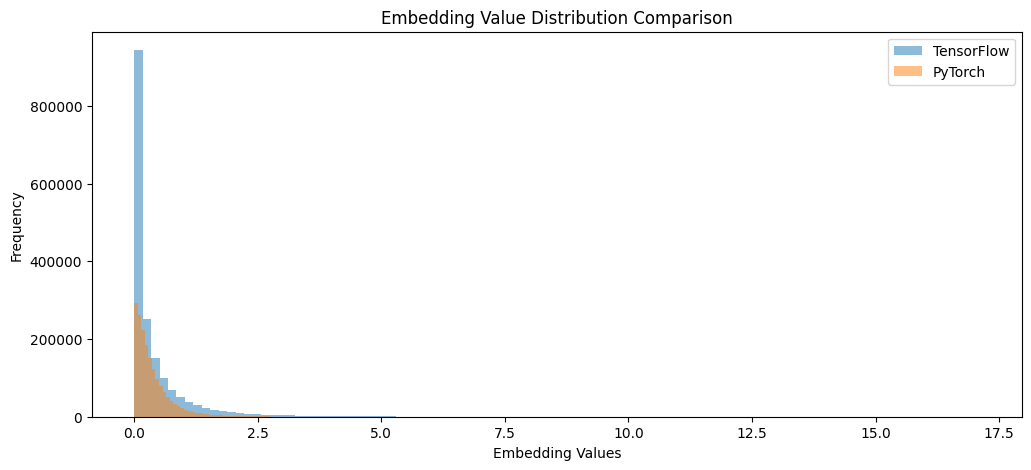

Sample 539 correlation coefficient: 0.0140
Sample 518 correlation coefficient: -0.0073
Sample 20 correlation coefficient: 0.0343
Sample 263 correlation coefficient: -0.0631
Sample 212 correlation coefficient: 0.0078
Sample 240 correlation coefficient: -0.0038
Sample 824 correlation coefficient: 0.0306
Sample 455 correlation coefficient: -0.0029
Sample 838 correlation coefficient: -0.0229
Sample 372 correlation coefficient: -0.0224
TensorFlow processing time: 88.35 seconds
PyTorch processing time: 68.44 seconds
Speed difference: +22.53% (negative means PyTorch is slower)


In [3]:
# TensorFlow vs PyTorch Embedding Performance Comparison

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

tf_path = '../embeddings/tf_embeddings.npy'
torch_path = '../embeddings/torch_embeddings.npy'

tf_embeddings = np.load(tf_path)
torch_embeddings = np.load(torch_path)

tf_stats_path = '../embeddings/tf_stats.csv'
torch_stats_path = '../embeddings/torch_stats.csv'

tf_stats = pd.read_csv(tf_stats_path)
torch_stats = pd.read_csv(torch_stats_path)

print(f"TensorFlow embedding shape: {tf_embeddings.shape}")
print(f"PyTorch embedding shape: {torch_embeddings.shape}")

print(f"TensorFlow processing time: {tf_stats.loc[0, 'processing_time_seconds']} seconds")
print(f"PyTorch processing time: {torch_stats.loc[0, 'processing_time_seconds']} seconds")

tf_mean = np.mean(tf_embeddings)
torch_mean = np.mean(torch_embeddings)
print(f"TensorFlow embedding mean: {tf_mean:.6f}")
print(f"PyTorch embedding mean: {torch_mean:.6f}")

plt.figure(figsize=(12,5))
plt.hist(tf_embeddings.flatten(), bins=100, alpha=0.5, label='TensorFlow')
plt.hist(torch_embeddings.flatten(), bins=100, alpha=0.5, label='PyTorch')
plt.title('Embedding Value Distribution Comparison')
plt.xlabel('Embedding Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

sample_indices = np.random.choice(len(tf_embeddings), size=10, replace=False)

for idx in sample_indices:
    tf_vec = tf_embeddings[idx]
    torch_vec = torch_embeddings[idx]
    corr, _ = pearsonr(tf_vec, torch_vec)
    print(f"Sample {idx} correlation coefficient: {corr:.4f}")

tf_time = tf_stats.loc[0, 'processing_time_seconds']
torch_time = torch_stats.loc[0, 'processing_time_seconds']
speed_diff = (tf_time - torch_time) / tf_time * 100
print(f"TensorFlow processing time: {tf_time:.2f} seconds")
print(f"PyTorch processing time: {torch_time:.2f} seconds")
print(f"Speed difference: {speed_diff:+.2f}% (negative means PyTorch is slower)")